<a href="https://colab.research.google.com/github/muhfadh/Tugas_Praktikum_ML_A_297-233/blob/main/Tugas/image_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%cd C:\Users\Fadhlan\Pembelajaran Mesin\Dataset\melanoma detection\

C:\Users\Fadhlan\Pembelajaran Mesin\Dataset\melanoma detection


In [ ]:
%ls

 Volume in drive C is Windows
 Volume Serial Number is 5232-3FDD

 Directory of C:\Users\Fadhlan\Pembelajaran Mesin\Dataset\melanoma detection

08/11/2021  15:14    <DIR>          .
08/11/2021  15:14    <DIR>          ..
08/11/2021  15:14    <DIR>          acral melanoma
08/11/2021  15:14    <DIR>          benign nevi
08/11/2021  15:14    <DIR>          testing
08/11/2021  15:14    <DIR>          training
08/11/2021  15:14    <DIR>          validation
               0 File(s)              0 bytes
               7 Dir(s)  31.602.569.216 bytes free


In [ ]:
import os
from matplotlib import pyplot as plt
dir1 = r'C:/Users/Fadhlan/Pembelajaran Mesin/Dataset/melanoma detection/training/acral melanoma/'
file_names_train_melanoma = [f_name for f_name in os.listdir(dir1)]

In [ ]:
img_path = 'C:/Users/Fadhlan/Pembelajaran Mesin/Dataset/melanoma detection/training/acral melanoma/'+file_names_train_melanoma[0]

In [ ]:
img_path

'C:/Users/Fadhlan/Pembelajaran Mesin/Dataset/melanoma detection/training/acral melanoma/AM (1).JPG'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
image = cv2.imread(img_path)

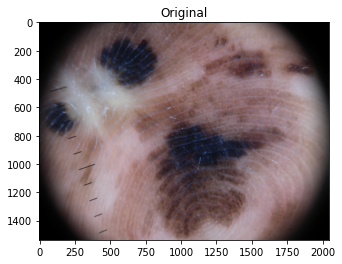

In [ ]:
plt_imshow("Original", image)

In [ ]:
import numpy as np
import cv2

def estimasi_radius(img):
    mx = img[img.shape[0] // 2,:,:].sum(1)
    rx = (mx > mx.mean() / 20).sum() / 2
    my = img[:,img.shape[1] // 2,:].sum(1)
    ry = (my > my.mean() / 20).sum() / 2
    return (ry, rx)

def crop_img(img, h, w):
        h_margin = (img.shape[0] - h) // 2 if img.shape[0] > h else 0
        w_margin = (img.shape[1] - w) // 2 if img.shape[1] > w else 0
        crop_img = img[h_margin:h + h_margin,w_margin:w + w_margin,:]
        return crop_img
    
def hapus_outer_circle(a, p, r):
    b = np.zeros(a.shape, dtype=np.uint8)
    cv2.circle(b, (a.shape[1] // 2, a.shape[0] // 2), int(r * p), (1, 1, 1), -1, 8, 0)
    return a * b + 0 * (1 - b)
    
def preprocess_image_training(file):
    scale = 112
    IMG_SIZE = 224
    input_filepath = 'C:/Users/Fadhlan/Pembelajaran Mesin/Dataset/melanoma detection/training/acral melanoma/{}'.format(file)
    output_filepath = 'C:/Users/Fadhlan/Pembelajaran Mesin/Dataset/preprocess-2/acral melanoma/{}'.format(file)
    
    img = cv2.imread(input_filepath)
    ry, rx = estimate_radius(img)

    resize_scale = scale / max(rx, ry)
    w = min(int(rx * resize_scale * 2), scale * 2)
    h = min(int(ry * resize_scale * 2), scale * 2)
    
    img = cv2.resize(img, (0,0), fx=resize_scale, fy=resize_scale)
    img = crop_img(img, h, w)
    img = cv2.flip(img, 1)
    img = hapus_outer_circle(img, 0.8, scale)

    cv2.imwrite(output_filepath, cv2.resize(img, (IMG_SIZE,IMG_SIZE)))
    return output_filepath

In [ ]:
new_img_path = 'C:/Users/Fadhlan/Pembelajaran Mesin/Dataset/preprocess-2/acral melanoma/'+file_names_train_melanoma[0]

In [ ]:
from PIL import Image
im = Image.open(new_img_path)
img = im.convert('RGB')

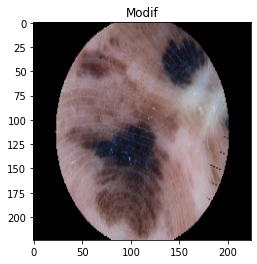

In [ ]:
plt.imshow(img)
plt.title('Modif')
plt.show()